In [5]:
import cv2

In [6]:
def generate_dataset():
    cascPath = "haarcascade_frontalface_default.xml"
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + cascPath)
    def face_cropped(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
        gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale( gray, 1.3, 5)
        if faces is ():
            return None

        # Crop all faces found
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h, x:x+w]
        return cropped_face

    cap = cv2.VideoCapture(0)
    img_id = 0
    
    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame), (50,50))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            file_name_path = "Images for visualization/"+"Pooja."+str(img_id)+'.jpg'
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2 )
            
            cv2.imshow("Cropped_Face", face)
            #print("Face collection started")
        else:
            print("Face not found")
            pass
        if cv2.waitKey(1)==13 or int(img_id)==600:
            break
                
    cap.release()
    cv2.destroyAllWindows()
    print("Collecting samples is completed !!!")

<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\pooja\AppData\Local\Temp/ipykernel_18732/438016711.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [7]:
#generate_dataset()

In [8]:
import numpy as np # pip install numpy

In [9]:
def my_label(image_name):
    name = image_name.split('.')[-3] 
    if name=="Mythri":
        return np.array([1,0])
    elif name=="Pooja":
        return np.array([0,1])

In [10]:
import os
from random import shuffle
from tqdm import tqdm

In [11]:
def my_data():
    data = []
    for img in tqdm(os.listdir("Images for visualization")):
        path=os.path.join("Images for visualization",img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)  
    return data

In [12]:
data = my_data()

100%|█████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:01<00:00, 946.90it/s]


In [14]:
train = data[:700]  
test = data[700:]
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)
y_test = [i[1] for i in test]
#print(y_train.shape)
#print(y_test.shape)

(700, 50, 50, 1)
(500, 50, 50, 1)


AttributeError: 'list' object has no attribute 'shape'

In [10]:
#Creating the model

import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [11]:
# from tensorflow.python.framework import ops
# ops.reset_default_graph()
# convnet = input_data(shape=[50,50,1])

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))  # 11*11
# model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((2, 2))) # 4*4
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.MaxPooling2D((2, 2))) # 2*2
# model.add(tf.keras.layers.Dense(2, activation='softmax'))
# model.summary()

In [14]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
convnet = input_data(shape=[50,50,1]) # 50*50 image
convnet = conv_2d(convnet, 32, 3, activation='relu') #48*48 
# 32 filters and stride=5 so that the filter will move 5 pixel or unit at a time
convnet = max_pool_2d(convnet, 2) #24*24
convnet = conv_2d(convnet, 64, 3, activation='relu') #22*22
convnet = max_pool_2d(convnet, 2) #11*11
convnet = conv_2d(convnet, 128, 3, activation='relu') #9*9
convnet = max_pool_2d(convnet, 2)#4*4
convnet = fully_connected(convnet, 512, activation='relu') #2*2
convnet = dropout(convnet, 0.5)
convnet = fully_connected(convnet, 2, activation='softmax') #2*2
convnet = regression(convnet, optimizer='adam', learning_rate = 0.001, loss='categorical_crossentropy')
model = tflearn.DNN(convnet, tensorboard_verbose=1)
model.fit(X_train, y_train, n_epoch=10, validation_set=(X_test, y_test), show_metric = True, run_id="FRS" )

Training Step: 109  | total loss: 0.75946 | time: 4.449s
| Adam | epoch: 010 | loss: 0.75946 - acc: 0.9659 -- iter: 640/700
Training Step: 110  | total loss: 0.68352 | time: 5.903s
| Adam | epoch: 010 | loss: 0.68352 - acc: 0.9693 | val_loss: 0.00000 - val_acc: 1.0000 -- iter: 700/700
--


In [15]:
def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("Images for visualization")):
        path = os.path.join("Images for visualization", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

In [16]:
Vdata = data_for_visualization()

100%|█████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:01<00:00, 750.86it/s]


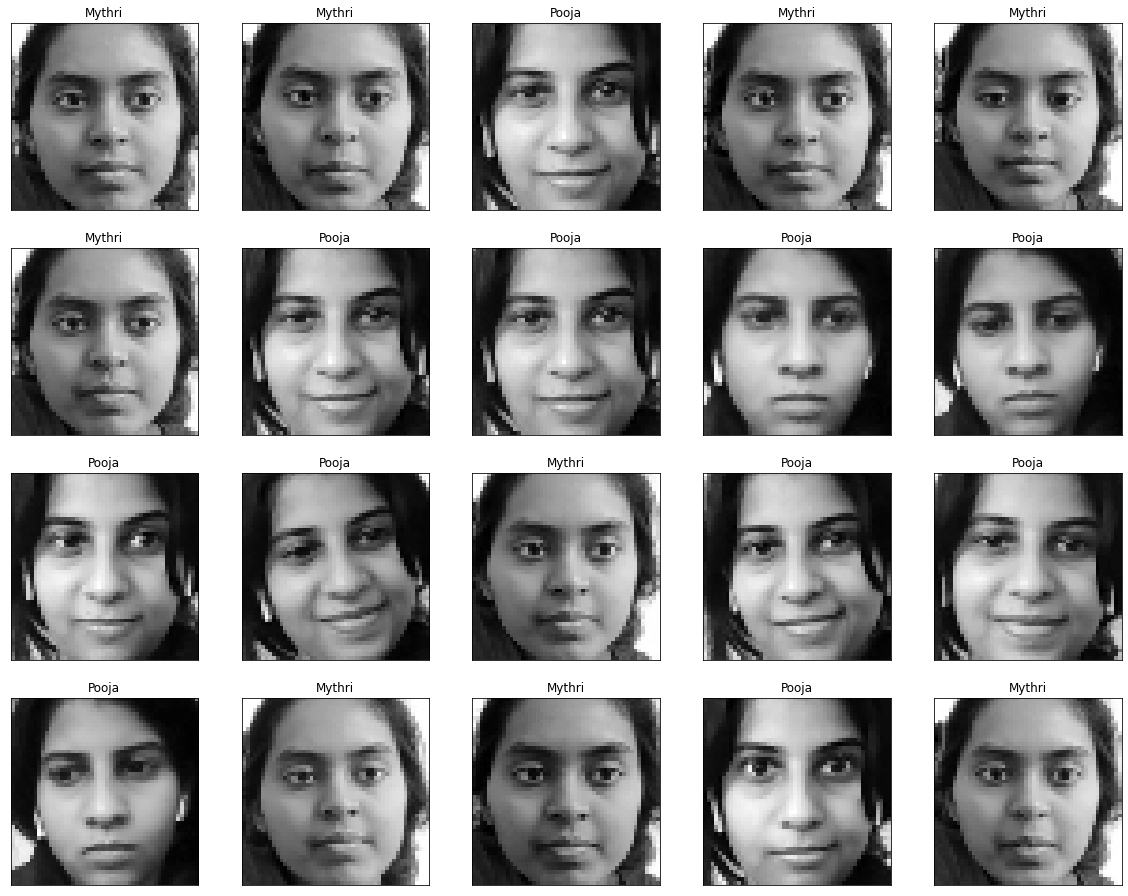

In [17]:
import matplotlib.pyplot as plt   # pip install matplotlib

fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 0:
        my_label = 'Mythri'
    else:
        my_label = 'Pooja'
        
    y.imshow(image, cmap='gray')
    plt.title(my_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()